In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import seml
import seaborn.objects as so
import mplscience
import matplotlib as mpl

%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
seml_run = "moscot_align"
results = seml.get_results(seml_run, to_data_frame=True)
configs = seml.get_results(
    seml_run,
)
results = results[results["config.model.tool.type"] == "moscot"].copy()

  0%|          | 0/1080 [00:00<?, ?it/s]

  0%|          | 0/1080 [00:00<?, ?it/s]

  0%|          | 0/1080 [00:00<?, ?it/s]

  0%|          | 0/1080 [00:00<?, ?it/s]

In [3]:
# results = results[results["config.model.tool.type"] == "gpsa"].copy()
# results.to_csv(
#     "/home/icb/giovanni.palla/code/moscot_benchmarks/experiments/space/alignment/gpsa_results.csv.gz"
# )
results3 = pd.read_csv(
    "/home/icb/giovanni.palla/code/moscot_benchmarks/experiments/space/alignment/gpsa_results.csv.gz"
)
results3 = results3[results3["config.model.tool.type"] == "gpsa"].copy()

In [4]:
seml_run = "moscot_paste"
results2 = seml.get_results(seml_run, to_data_frame=True)
configs2 = seml.get_results(
    seml_run,
)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

In [5]:
# seml_run = "moscot_align2"
# results3 = seml.get_results(seml_run, to_data_frame=True)
# configs3 = seml.get_results(
#     seml_run,
# )

In [6]:
results = pd.concat([results, results2, results3])

In [7]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.data.dataset.adata', 'config.data.dataset.batch',
       'config.data.dataset.fraction', 'config.data.dataset.seeds',
       'config.model.solver.alpha', 'config.model.solver.epsilon',
       'config.model.solver.rank', 'config.model.tool.type',
       'config.train.training.output', 'config.train.training.reference_key',
       'config.seed', 'result.mse', 'result.time', 'result.n_obs',
       'result.n_var', 'config.model.solver.kernel', 'config.model.solver.lr',
       'config.model.solver.n_epochs', 'config.model.solver.dissimilarity',
       'config.model.solver.norm', 'Unnamed: 0', 'unique_config'],
      dtype='object')

In [8]:
columns = [
    "config.model.solver.alpha",
    "config.model.solver.epsilon",
    "config.model.solver.rank",
    "config.model.tool.type",
    "config.model.solver.kernel",
    "config.model.solver.lr",
    "config.model.solver.n_epochs",
    "config.model.solver.dissimilarity",
    "config.model.solver.norm",
    "config.model.tool.type",
    "config.data.dataset.batch",
    "config.data.dataset.fraction",
]
results["unique_config"] = results[columns].apply(
    lambda x: "".join(str(x)).replace(" ", ""), axis=1, raw=True
)

In [9]:
results["config.model.tool.type"].unique()

array(['moscot', 'paste', 'gpsa'], dtype=object)

In [10]:
results["unique_config"]

0      [0.10.001-1.0'moscot'nannannannannan'moscot'10.7]
1      [0.10.001-1.0'moscot'nannannannannan'moscot'10.7]
2      [0.10.001-1.0'moscot'nannannannannan'moscot'10.7]
3      [0.10.001100.0'moscot'nannannannannan'moscot'1...
4      [0.10.001100.0'moscot'nannannannannan'moscot'1...
                             ...                        
427    [nannannan'gpsa''RBF'0.0051000.0nannan'gpsa'41.0]
428    [nannannan'gpsa''RBF'0.0051000.0nannan'gpsa'41.0]
429    [nannannan'gpsa''RBF'0.0052000.0nannan'gpsa'41.0]
430    [nannannan'gpsa''RBF'0.0052000.0nannan'gpsa'41.0]
431    [nannannan'gpsa''RBF'0.0052000.0nannan'gpsa'41.0]
Name: unique_config, Length: 1440, dtype: object

In [11]:
cols = [
    "unique_config",
    "result.mse",
    "result.time",
    "result.n_obs",
    "result.n_var",
    "config.data.dataset.batch",
    "config.data.dataset.fraction",
    "config.data.dataset.seeds",
    "config.model.tool.type",
]
rename_cols = [
    "config",
    "mse",
    "time",
    "n_obs",
    "n_var",
    "batch",
    "fraction",
    "seeds",
    "method",
]
final_df = results[cols].rename(columns={k: v for k, v in zip(cols, rename_cols)})
final_df

,config,mse,time,n_obs,n_var,batch,fraction,seeds,method
0,[0.10.001-1.0'moscot'nannannannannan'moscot'10.7],0.047985,13.410636,557,500,1,0.7,326,moscot
1,[0.10.001-1.0'moscot'nannannannannan'moscot'10.7],0.044649,13.231855,560,500,1,0.7,403,moscot
2,[0.10.001-1.0'moscot'nannannannannan'moscot'10.7],0.037396,14.448722,559,500,1,0.7,316,moscot
3,[0.10.001100.0'moscot'nannannannannan'moscot'1...,0.019608,42.859563,557,500,1,0.7,326,moscot
4,[0.10.001100.0'moscot'nannannannannan'moscot'1...,0.016535,40.619770,560,500,1,0.7,403,moscot
...,...,...,...,...,...,...,...,...,...
427,[nannannan'gpsa''RBF'0.0051000.0nannan'gpsa'41.0],0.001582,1114.568561,800,500,4,1.0,403,gpsa
428,[nannannan'gpsa''RBF'0.0051000.0nannan'gpsa'41.0],0.001442,1348.032475,800,500,4,1.0,316,gpsa
429,[nannannan'gpsa''RBF'0.0052000.0nannan'gpsa'41.0],1.549978,1306.117406,800,500,4,1.0,326,gpsa
430,[nannannan'gpsa''RBF'0.0052000.0nannan'gpsa'41.0],0.001592,1247.832315,800,500,4,1.0,403,gpsa


In [12]:
final_df["method"].value_counts()

moscot    648
gpsa      432
paste     360
Name: method, dtype: int64

In [13]:
best_config = []
for d in final_df.batch.unique():
    for m in final_df.method.unique():
        for f in final_df.fraction.unique():
            cond = (
                (final_df.method == m)
                & (final_df.batch == d)
                & (final_df.fraction == f)
            )
            temp_df = final_df[cond].copy()
            conf = (
                temp_df[["config", "mse"]]
                .groupby(["config"])
                .median()
                .reset_index()
                .sort_values(by="mse")
                .reset_index(drop=True)
                .config[0]
            )
            best_config.append(temp_df[temp_df.config == conf].copy())
            # best_config.append()

In [14]:
plot_df = pd.concat(best_config)
plot_df["method"] = pd.Categorical(
    plot_df["method"], categories=["moscot", "paste", "gpsa"]
)
plot_df = plot_df.drop_duplicates()

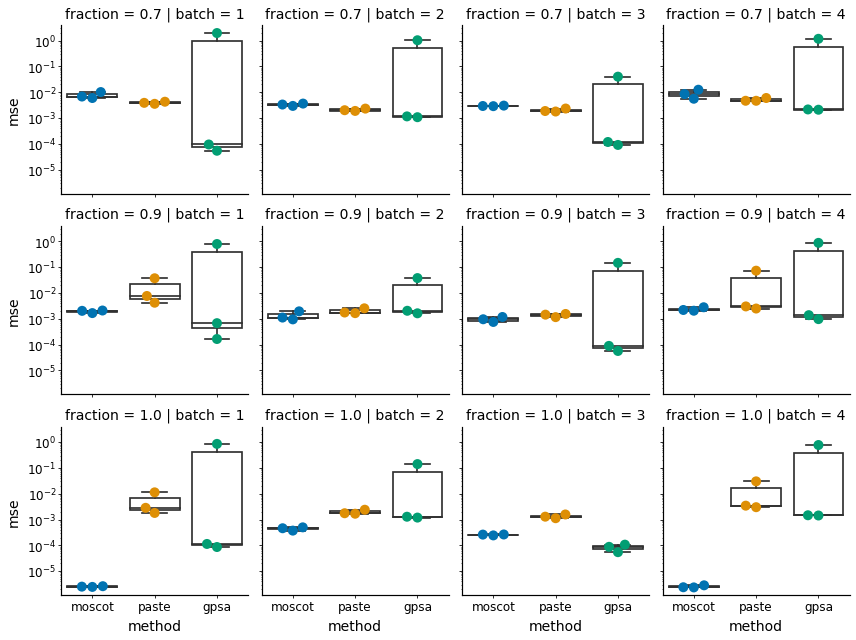

In [15]:
mplscience.set_style()
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["figure.figsize"] = (3, 3)
# palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
# fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)


def fixed_boxplot(x, y, *args, label=None, **kwargs):

    sns.boxplot(
        x=x,
        y=y,
        hue=x,
        palette="colorblind",
        boxprops={"facecolor": "None"},
        dodge=False,
        *args,
        **kwargs,
        labels=[label]
    ).set_yscale("log")
    sns.swarmplot(
        x=x, y=y, hue=x, palette="colorblind", size=10, dodge=False, *args, **kwargs
    ).set_yscale("log")


g = sns.FacetGrid(plot_df, col="batch", row="fraction")
g.map(fixed_boxplot, "method", "mse")
axes = g.axes.flatten()

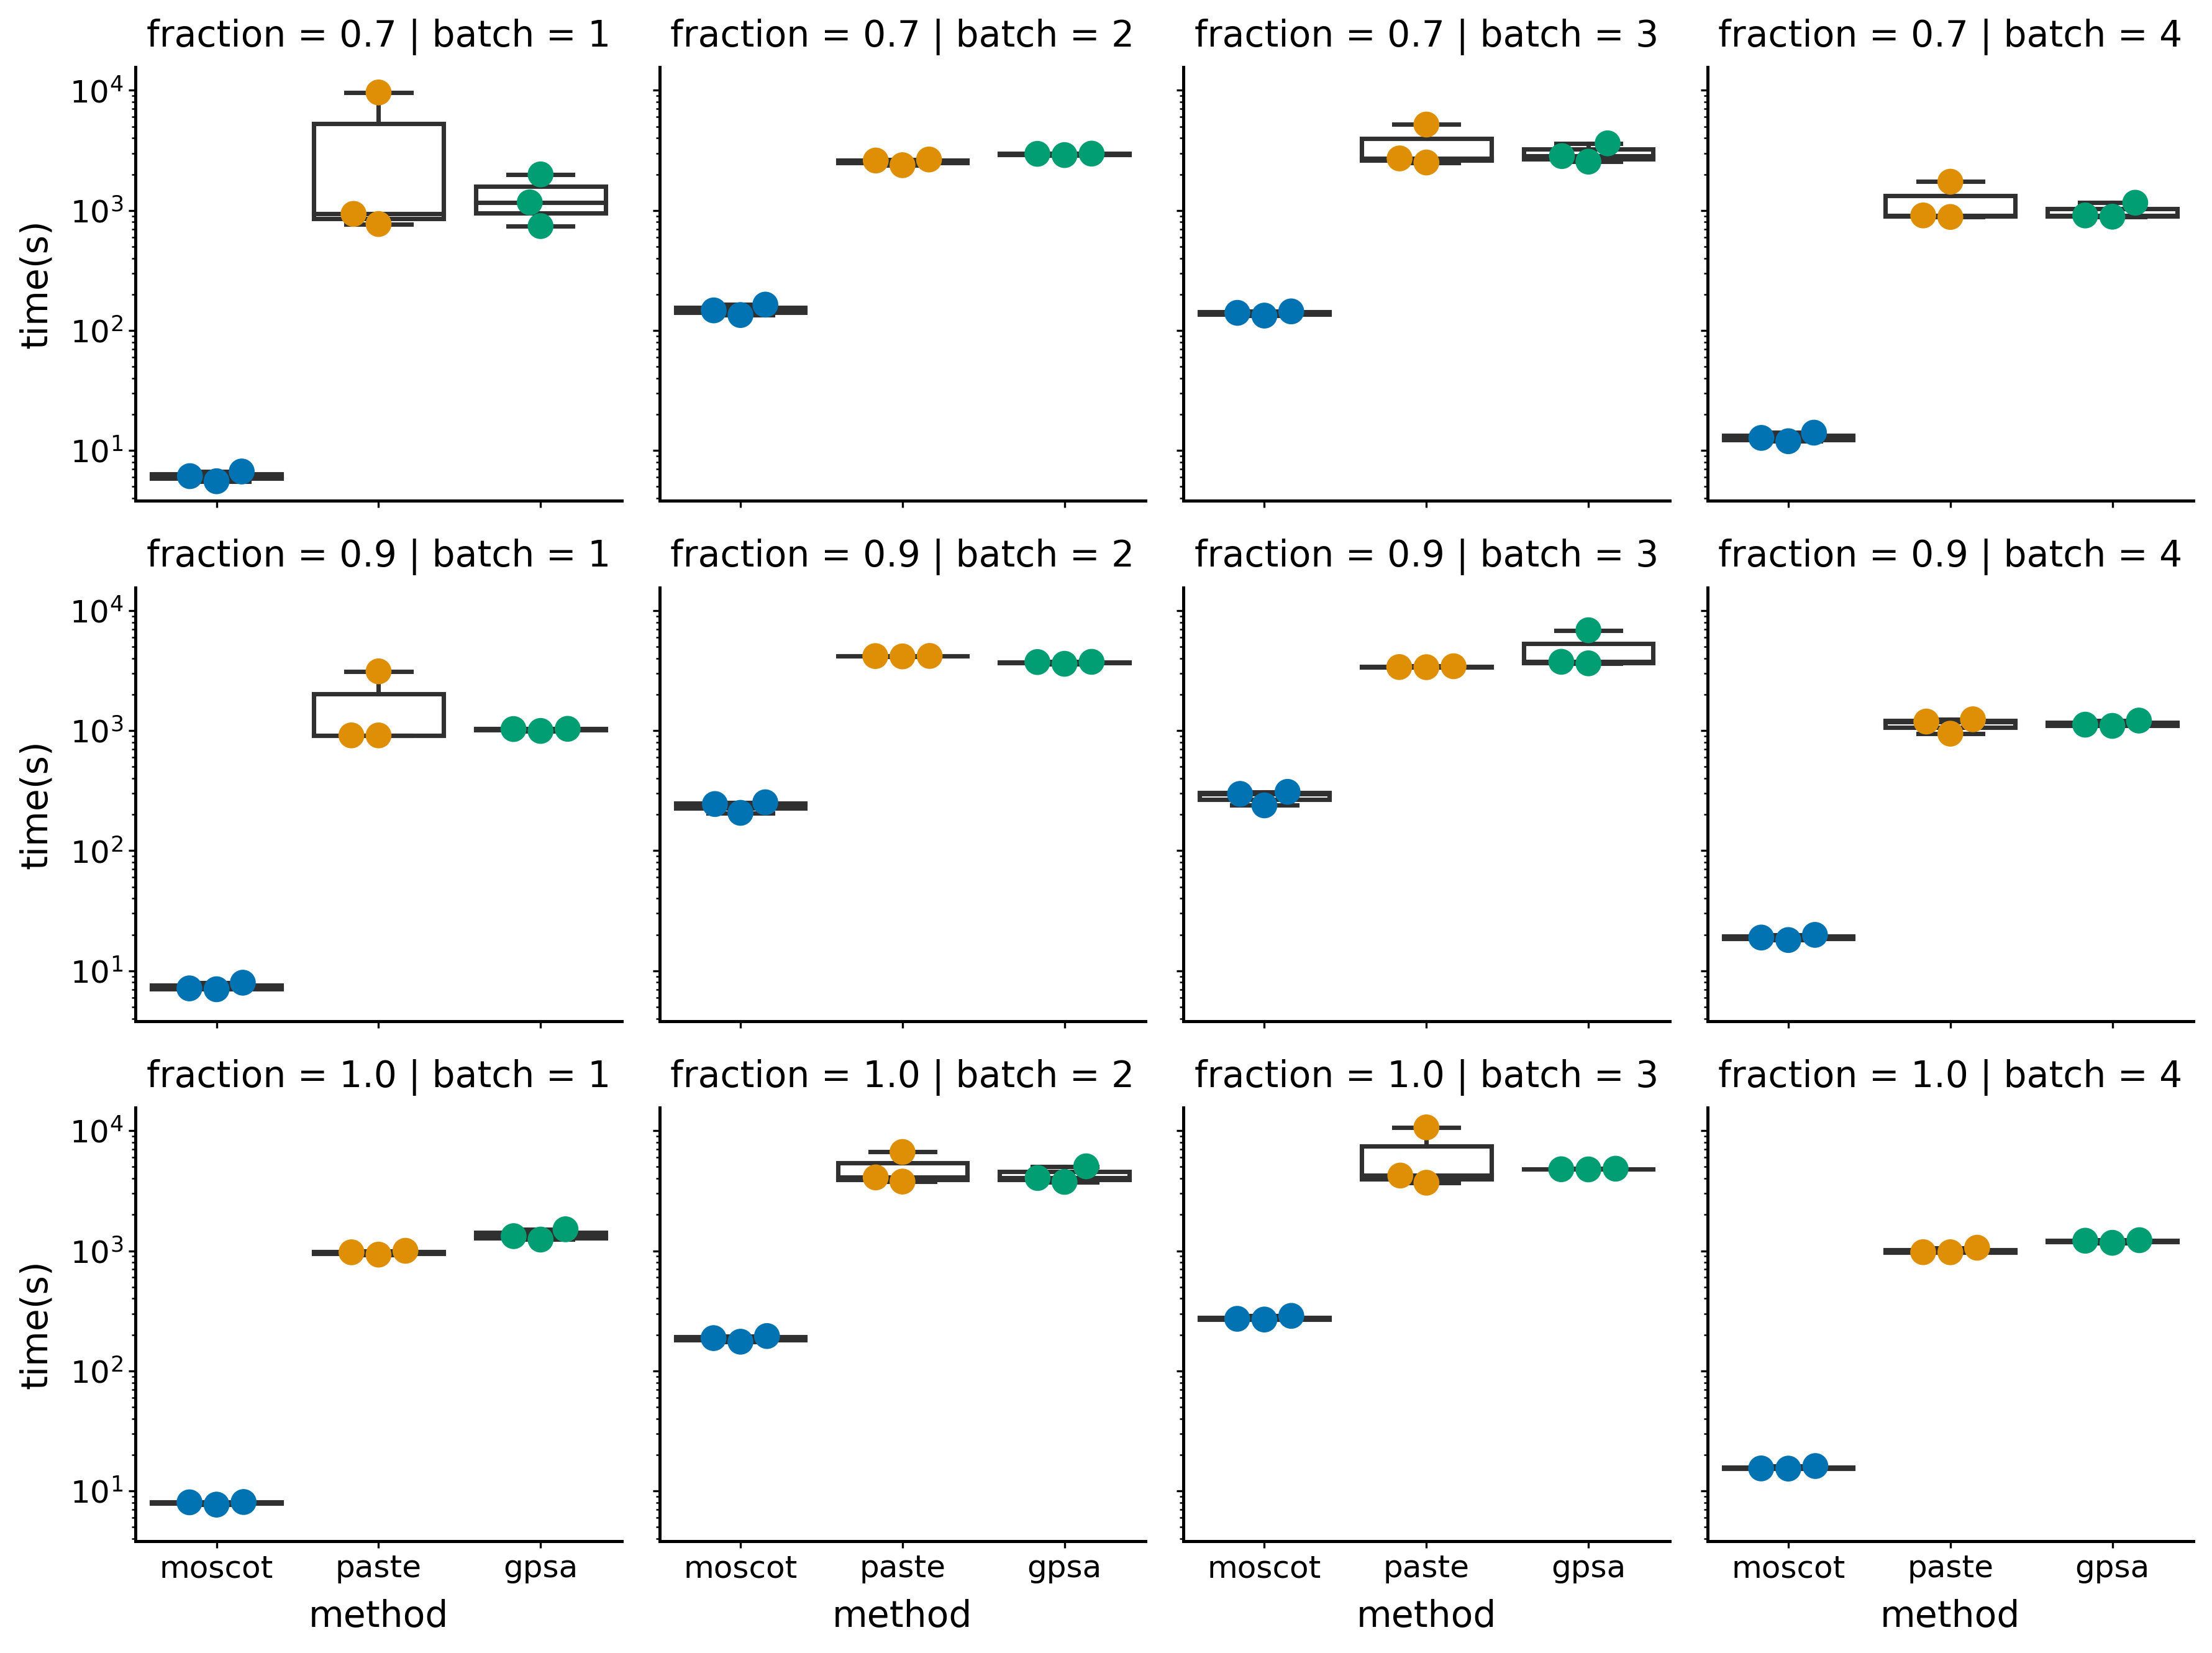

In [21]:
mplscience.set_style()
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["figure.figsize"] = (3, 3)
# palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
# fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)


def fixed_boxplot(x, y, *args, label=None, **kwargs):

    sns.boxplot(
        x=x,
        y=y,
        hue=x,
        palette="colorblind",
        boxprops={"facecolor": "None"},
        dodge=False,
        *args,
        **kwargs,
        labels=[label],
    ).set_yscale("log")
    sns.swarmplot(
        x=x, y=y, hue=x, palette="colorblind", size=10, dodge=False, *args, **kwargs
    ).set_yscale("log")


g = sns.FacetGrid(plot_df, col="batch", row="fraction")
g.map(fixed_boxplot, "method", "time")
axes = g.axes.flatten()
for ax, siz in zip(axes, plot_df):
    # ax.set_title(f"Size = {siz}")
    ax.set_ylabel("time(s)")

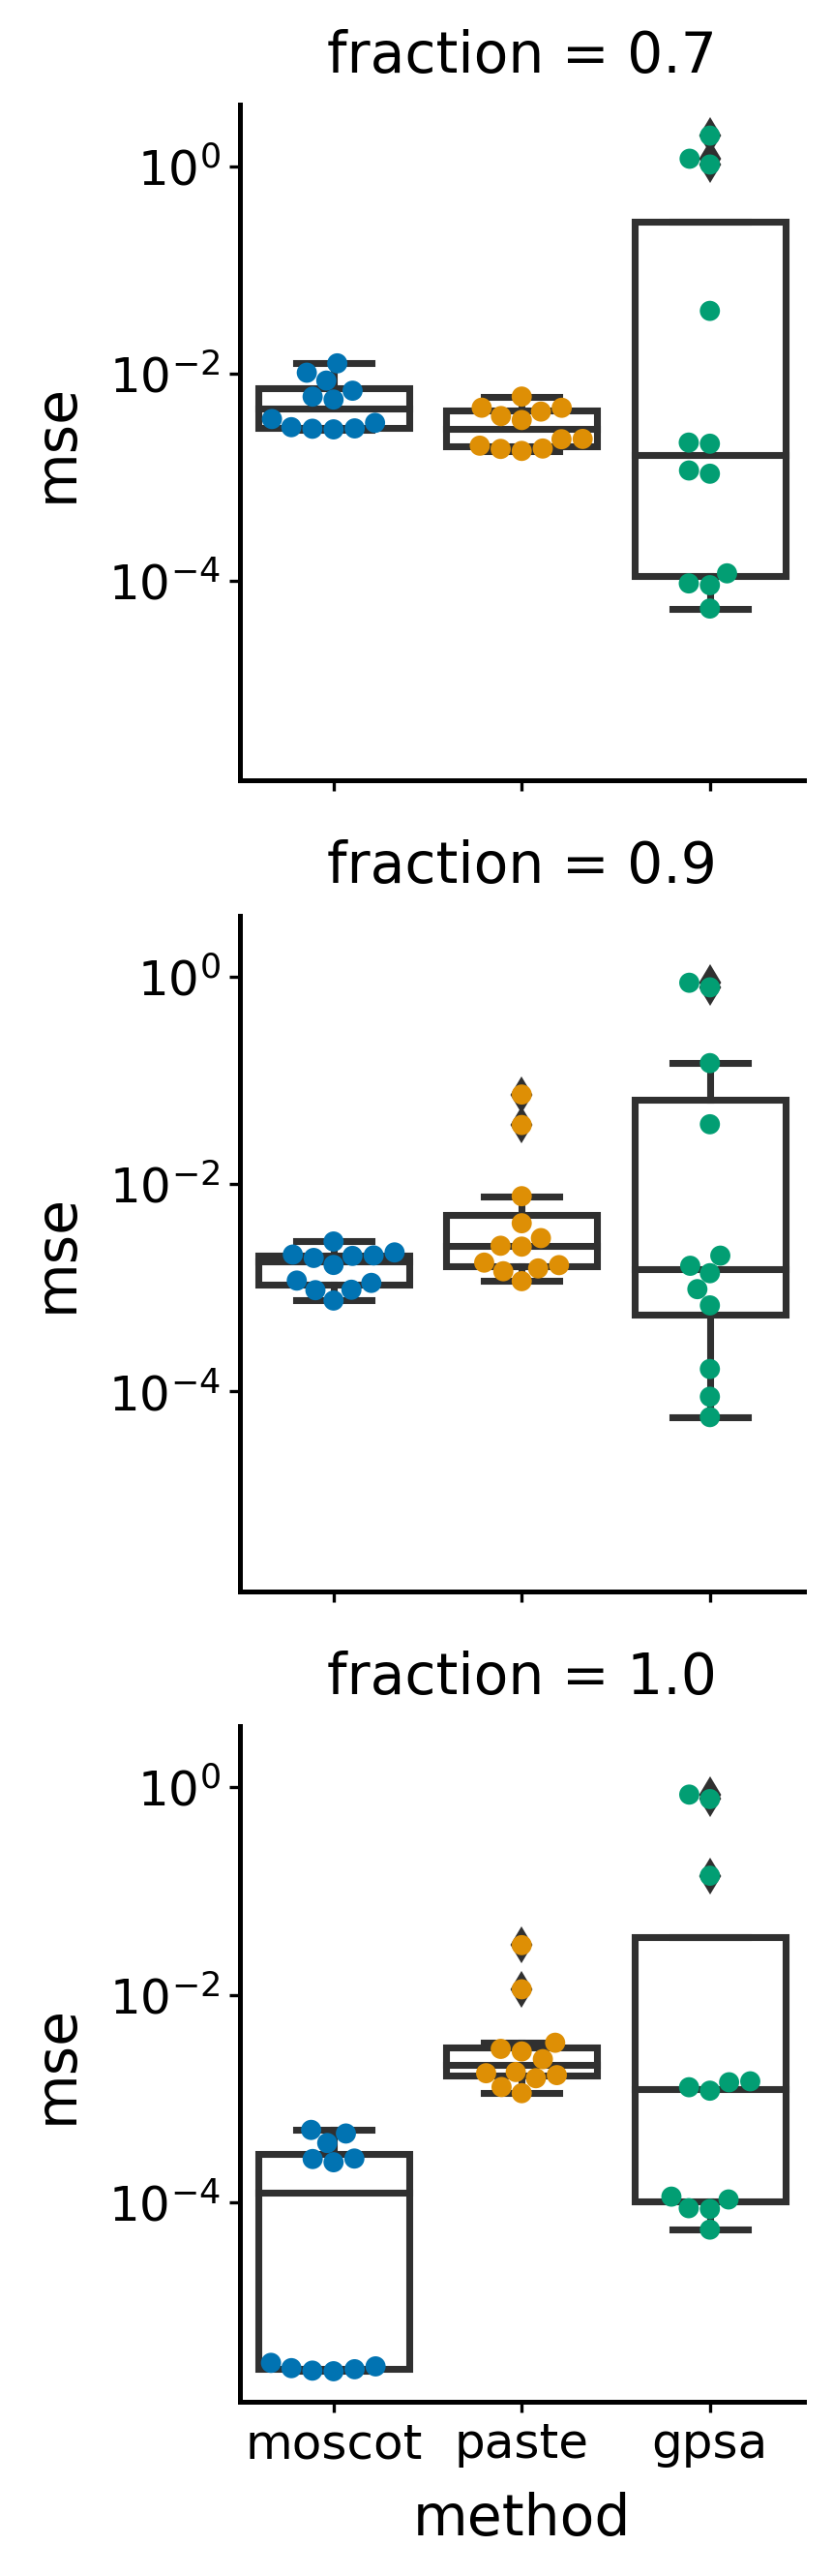

In [30]:
def fixed_boxplot(x, y, *args, label=None, **kwargs):

    sns.boxplot(
        x=x,
        y=y,
        hue=x,
        palette="colorblind",
        boxprops={"facecolor": "None"},
        dodge=False,
        *args,
        **kwargs,
        labels=[label]
    ).set_yscale("log")
    sns.swarmplot(
        x=x, y=y, hue=x, palette="colorblind", size=5, dodge=False, *args, **kwargs
    ).set_yscale("log")


g = sns.FacetGrid(plot_df, row="fraction")
g.map(fixed_boxplot, "method", "mse")

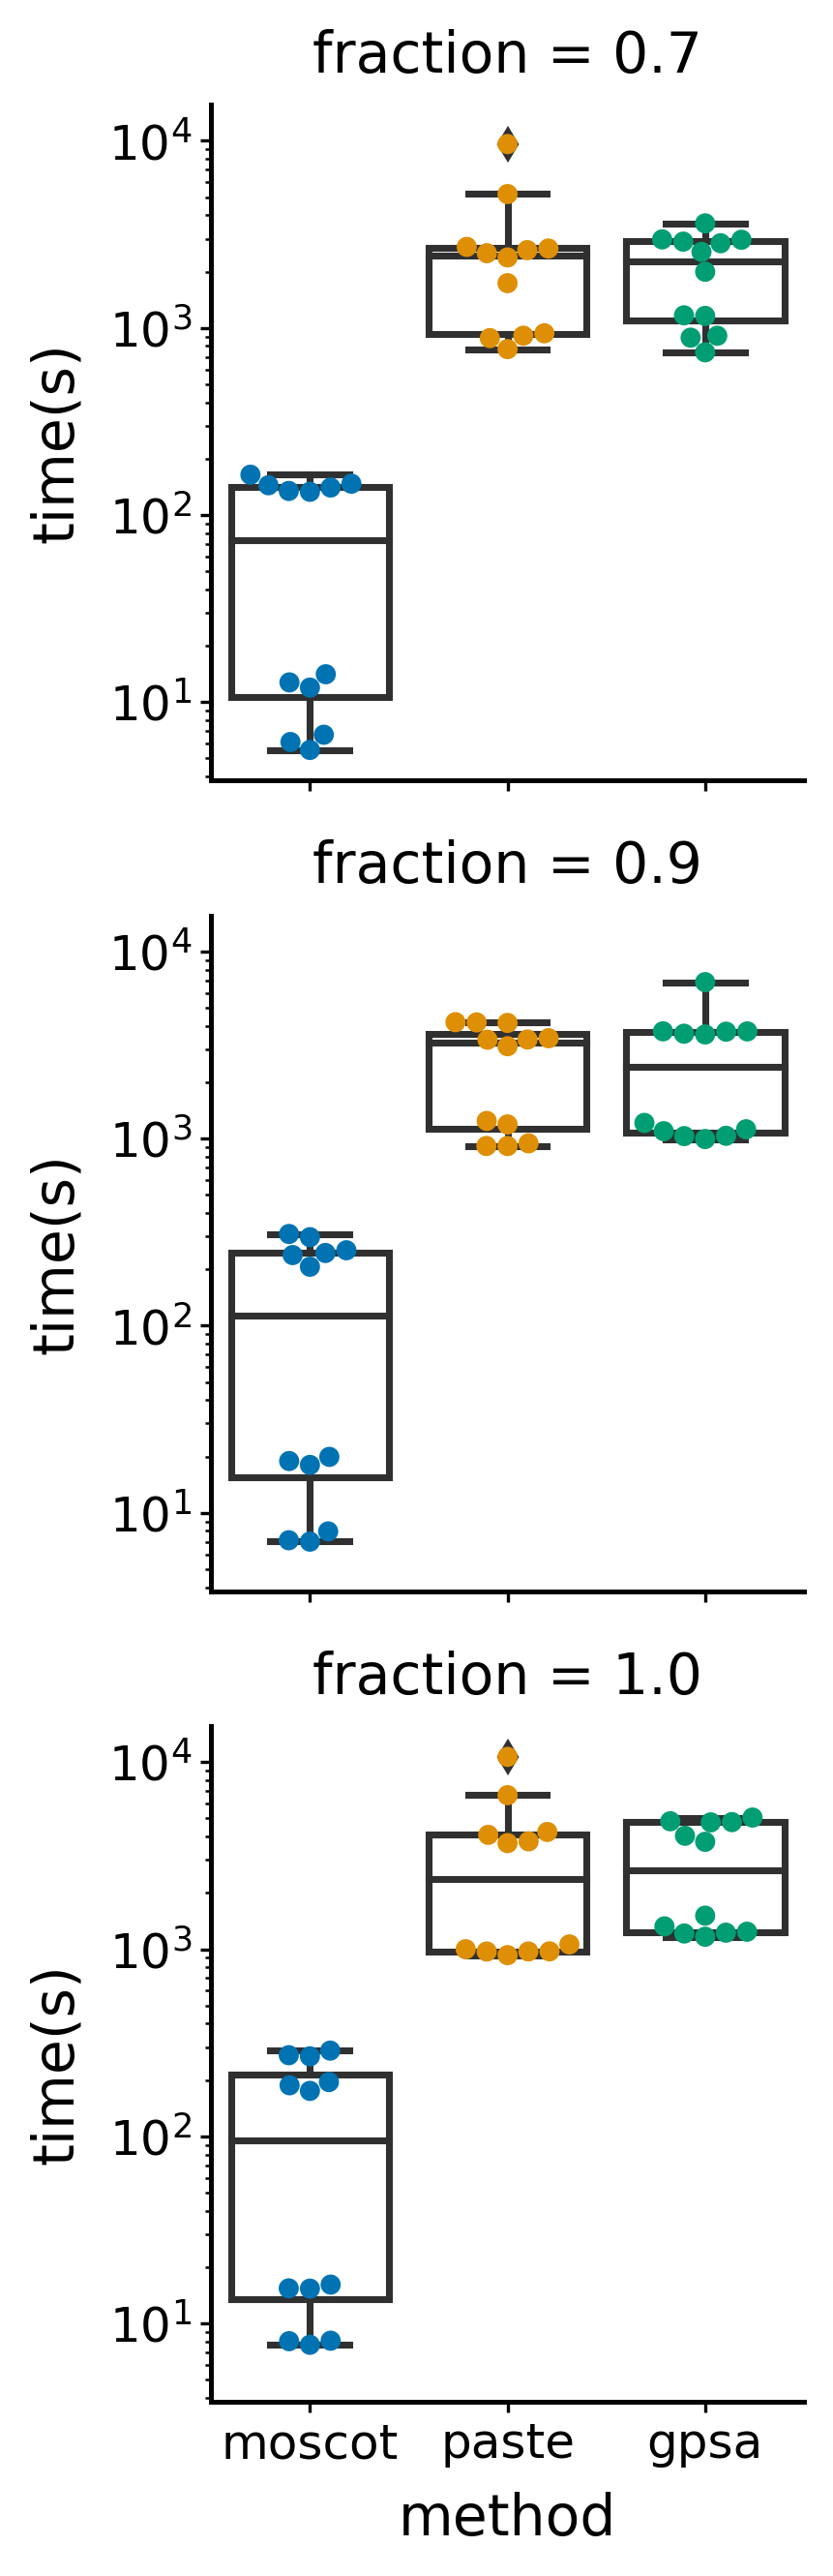

In [22]:
def fixed_boxplot(x, y, *args, label=None, **kwargs):

    sns.boxplot(
        x=x,
        y=y,
        hue=x,
        palette="colorblind",
        boxprops={"facecolor": "None"},
        dodge=False,
        *args,
        **kwargs,
        labels=[label]
    ).set_yscale("log")
    sns.swarmplot(
        x=x, y=y, hue=x, palette="colorblind", size=5, dodge=False, *args, **kwargs
    ).set_yscale("log")


g = sns.FacetGrid(plot_df, row="fraction")
g.map(fixed_boxplot, "method", "time")
axes = g.axes.flatten()
for ax in axes:
    ax.set_ylabel("time(s)")